In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\Logistic Regression (1)\Logistic Regression\Titanic_train.csv')
test_df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\Logistic Regression (1)\Logistic Regression\Titanic_test.csv')

In [4]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
si = SimpleImputer(strategy='mean')

In [9]:
train_df.iloc[:, 5] = si.fit_transform(train_df.iloc[:, [5]])


In [10]:
train_df[['Age']] = si.fit_transform(train_df[['Age']])


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_df.iloc[:, 5] = si.fit_transform(test_df.iloc[:,[5]])

In [13]:
test_df[['Age']] = si.fit_transform(test_df[['Age']])

In [14]:
test_df.iloc[:, 8] = si.fit_transform(test_df.iloc[:,[8]])

In [15]:
test_df[['Fare']] = si.fit_transform(test_df[['Fare']])

In [16]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# Step 1: Identify irrelevant columns (these can be specific to your data)
irrelevant_columns = ['Pclass', 'Name','Ticket','Fare','Cabin','Embarked',]  # Modify this list

# Step 2: Remove irrelevant columns from both datasets
train_cleaned = train_df.drop(columns=irrelevant_columns, axis=1)
test_cleaned = test_df.drop(columns=irrelevant_columns, axis=1)


In [20]:
train_cleaned

,PassengerId,Survived,Sex,Age,SibSp,Parch
0,1,0,male,22.000000,1,0
1,2,1,female,38.000000,1,0
2,3,1,female,26.000000,0,0
3,4,1,female,35.000000,1,0
4,5,0,male,35.000000,0,0
...,...,...,...,...,...,...
886,887,0,male,27.000000,0,0
887,888,1,female,19.000000,0,0
888,889,0,female,29.699118,1,2
889,890,1,male,26.000000,0,0


In [21]:
# One-Hot Encoding using pandas `get_dummies`
train_cleaned = pd.get_dummies(train_cleaned, columns=['Sex'], drop_first=False)
train_cleaned

,PassengerId,Survived,Age,SibSp,Parch,Sex_female,Sex_male
0,1,0,22.000000,1,0,False,True
1,2,1,38.000000,1,0,True,False
2,3,1,26.000000,0,0,True,False
3,4,1,35.000000,1,0,True,False
4,5,0,35.000000,0,0,False,True
...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,False,True
887,888,1,19.000000,0,0,True,False
888,889,0,29.699118,1,2,True,False
889,890,1,26.000000,0,0,False,True


In [22]:
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from scipy.stats import uniform, loguniform

In [23]:
train_cleaned.columns
train_cleaned.head(5)

,PassengerId,Survived,Age,SibSp,Parch,Sex_female,Sex_male
0,1,0,22.0,1,0,False,True
1,2,1,38.0,1,0,True,False
2,3,1,26.0,0,0,True,False
3,4,1,35.0,1,0,True,False
4,5,0,35.0,0,0,False,True


In [24]:
# Step 1: Select the features (X) and target variable (y)
X = train_cleaned[['PassengerId','Age', 'SibSp', 'Parch','Sex_female','Sex_male']]  # Use the features except 'Survived'
y = train_cleaned['Survived']  # The target variable


In [25]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print(model)

LogisticRegression()


In [28]:
y_pred = model.predict(X_test_scaled)



In [29]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [30]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7821
Confusion Matrix:
[[88 17]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [31]:
# Regularization - Trying a different value of C (Regularization strength)
logreg = LogisticRegression(C=0.1)  # Smaller C means stronger regularization
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate again
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with C=0.1: {accuracy:.4f}')

Accuracy with C=0.1: 0.7821


In [32]:
# Define the parameter space for RandomizedSearchCV
param_dist = {
    'C': loguniform(1e-4, 1e4),  # Log-uniform distribution for C (regularization strength)
    'solver': ['liblinear','lbfgs']  # Different solvers to try
}

In [33]:
# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=25, cv=3, verbose=1, random_state=42, n_jobs=1)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters: {'C': 0.09915644566638401, 'solver': 'liblinear'}


In [34]:
# Initialize the model with best hyperparameters
best_logreg = LogisticRegression(C=0.09915644566638389, solver='liblinear')


In [35]:
# Train the model
best_logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=0.09915644566638389, solver='liblinear')

In [36]:

# Evaluate the model
y_pred = best_logreg.predict(X_test_scaled)


In [37]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329
Confusion Matrix:
[[88 17]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [38]:
!pip install imbalanced-learn

In [39]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [40]:
# 1. Random Oversampling (Increase the minority class)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [41]:

# 2. Random Undersampling (Reduce the majority class)
rus = RandomUnderSampler(random_state=42)
X_train_resampled2, y_train_resampled2 = rus.fit_resample(X_train, y_train)


In [42]:
# Logistic Regression with Oversampled Data
model_ros = LogisticRegression(max_iter=200)
model_ros.fit(X_train_resampled, y_train_resampled)
y_pred_ros = model_ros.predict(X_test)


In [43]:
# Logistic Regression with Undersampled Data
model_rus = LogisticRegression(max_iter=200)
model_rus.fit(X_train_resampled2, y_train_resampled2)
y_pred_rus = model_rus.predict(X_test)


In [44]:
# Evaluate with Random Oversampling
print("Random Oversampling Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ros)}")
print("Classification Report:\n", classification_report(y_test, y_pred_ros))


Random Oversampling Evaluation:
Accuracy: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [45]:
# Evaluate with Random Undersampling
print("Random Undersampling Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rus)}")
print("Classification Report:\n", classification_report(y_test, y_pred_rus))

Random Undersampling Evaluation:
Accuracy: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [51]:
# Ensure consistency in formats for training and testing
X_train = X_train.values  # Convert DataFrame to NumPy array
X_test = X_test.values    # Convert DataFrame to NumPy array


In [52]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [53]:
y_prob = model.predict_proba(X_test)[:, 1]

In [54]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


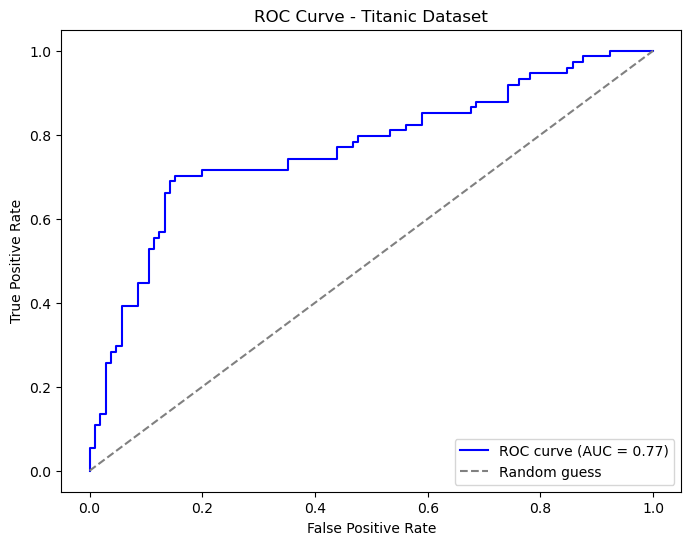

In [55]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Titanic Dataset')
plt.legend(loc='lower right')
plt.show()

In [56]:
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 0.77


Interview Questions:-  
1. Difference between precision and recall

   Recall (also called Sensitivity or True Positive Rate):

   The ability of the model to correctly identify all relevant instances.
    Formula:
            Recall = True Positives (TP)/
                     True Positives (TP)+False Negatives (FN)
 
    Focus: Capturing as many positives as possible.

    Precision:

    The proportion of true positive predictions out of all positive predictions made by the model.
    Formula:
    Precision = True Positives (TP)/
                True Positives (TP)+False Positives (FP)

     Focus: Minimizing false positives.
   
2. Cross-validation is a technique used to evaluate the performance of a model by splitting the dataset into multiple parts (or folds) and          training/testing the model on different subsets. It is particularly important in binary classification tasks because it ensures that the model   generalizes well and is not overly reliant on the specific split of training and test data.

Importance of cross validation:- 
1.Prevents Overfitting
2.Reliable Performance Metrics
3.Efficient Use of Data
4.Hyperparameter Tuning
5.Robustness










